In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.7 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import requests
import matplotlib.pyplot as plt


In [3]:
def get_stonks(stock_code,days):
  end_date = pd.Timestamp.now()
  start_date = end_date - pd.Timedelta(days=days)
  return yf.download(stock_code, start=start_date, end=end_date)


In [ ]:
# Calculate the moving average and exponential moving 
# def make_ma_ema(df,window,com):
#   style = mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up="r", down="#0000CC",inherit=True),
#                            gridcolor="gray", gridstyle="--", gridaxis="both")          
#   ma = df['Close'].rolling(window=200).mean()
#   ema = df['Close'].ewm(com=0.8).mean()
#   df['ema'] = ema
#   df['ma'] = ma
#   df['V_Price'] = (df['Close']-df['Open'])*df['Volume']
#   vwap = df['V_Price'].rolling('30d').mean()/df['Volume'].rolling('30d').mean()
#   plot_df = {'EMA': mpf.make_addplot(ema,color = 'Red'),
#            'MA': mpf.make_addplot(ma,color = 'Green'),
#            'VWAP':mpf.make_addplot(vwap, color = 'Blue')}
#   #Create a candlestick chart and add the moving average as an overlay - ema, ma, vwap
#   fig, axes = mpf.plot(df,style = style,type="candle",addplot=list(plot_df.values()),returnfig=True)
#   axes[0].legend([None]*(len(plot_df)+2))
#   handles = axes[0].get_legend().legendHandles
#   axes[0].legend(handles=handles[1:],labels=list(plot_df.keys()))
  # plot_df = [mpf.make_addplot(ema,color = 'Red'), mpf.make_addplot(ma,color = 'Green'),mpf.make_addplot(vwap, color = 'Blue')]
  # mpf.plot(df,style = style, type='candle', addplot=plot_df)

In [4]:
def diff_ma(df):
  df2 = diff(df)
  plt_ma  = [
    #mpf.make_addplot((df2['bar_positive_ema']), type='bar', color='#4dc790',panel = 2),
    #mpf.make_addplot((df2['bar_negative_ema']), type='bar', color='#fd6b6c',panel = 2),
    mpf.make_addplot((df2['bar_positive_ma']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((df2['bar_negative_ma']), type='bar', color='#fd6b6c', panel=2),
  ]
  mpf.plot(df, type = 'candle',volume=True, addplot=plt_ma,figsize = (15,7))

In [5]:
def diff_ema(df):
  df2 = diff(df)
  plt_ema  = [
    mpf.make_addplot((df2['bar_positive_ema']), type='bar', color='#4dc790',panel = 2),
    mpf.make_addplot((df2['bar_negative_ema']), type='bar', color='#fd6b6c',panel = 2),
    #mpf.make_addplot((df2['bar_positive_ma']), type='bar', color='#4dc790', panel=2),
    #mpf.make_addplot((df2['bar_negative_ma']), type='bar', color='#fd6b6c', panel=2),
  ]
  mpf.plot(df, type = 'candle',volume=True, addplot=plt_ema,figsize = (15,7))

In [6]:
def diff(df):
  df.dropna(inplace=True)
  df2 = pd.DataFrame()
  df2['mean_price'] = df[["High","Low"]].mean(axis = 1)
  df2['diff_ema'] = df['ema'] - df2['mean_price']
  df2['diff_ma'] = df['ma'] - df2['mean_price']
  df2['bar_positive_ema'] = df2['diff_ema'].map(lambda x: x if x > 0 else 0)
  df2['bar_negative_ema'] = df2['diff_ema'].map(lambda x: x if x < 0 else 0)
  df2['bar_positive_ma'] = df2['diff_ma'].map(lambda x: x if x > 0 else 0)
  df2['bar_negative_ma'] = df2['diff_ma'].map(lambda x: x if x < 0 else 0)
  return df2

In [7]:
def idkwhattocallthisfunc(df,days):
  df2 = diff(df)
  print(df2[['diff_ema','diff_ma']].iloc[0:days:1])
  #list_ko_kya_naam_du = []
  #print(df2['diff_ema'].iloc[-1:days - 1: -1])
  sum1 = df2['diff_ema'].iloc[-1:-7: -1].sum()
  sum2 = df2['diff_ema'].iloc[-1:-30: -1].sum() 
  sum3 = df2['diff_ema'].iloc[-1:-90: -1].sum()
  sum4 = df2['diff_ema'].iloc[-1::]
  ema_ki_list = [sum1,sum2,sum3,sum4]
  print("7 Day average ema " + str(sum1))
  print("30 Day average ema " + str(sum2))
  print("90 Day average ema " + str(sum3))
  print("previous Day average ema " + str(sum3))
  sum5 = df2['diff_ma'].iloc[-1:-7: -1].sum()
  sum6 = df2['diff_ma'].iloc[-1:-30: -1].sum() 
  sum7 = df2['diff_ma'].iloc[-1:-90: -1].sum()
  sum8 = df2['diff_ma'].iloc[-1::]
  print("7 Day average ma " + str(sum5))
  print("30 Day average ma " + str(sum6))
  print("90 Day average ma " + str(sum7))
  print("previous Day average ema " + str(sum8))
  ma_ki_list = [sum5,sum6,sum7,sum8]




In [8]:
def make_ma_ema(df,days,sc):
  ma = df['Close'].rolling(window=30).mean()
  ema = df['Close'].ewm(span=30, adjust=False).mean()
  df['ma'] = ma
  df['ema'] = ema
  fig, ax = plt.subplots(figsize = (15,7))
  ax.plot(df['Close'], label='Close')
  ax.plot(ma, label='30-day Moving Average')
  ax.plot(ema, label='30-day EMA')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.set_title(sc)
  ax.legend()
  plt.show()
  

In [9]:
def final_ema_bilkul(df,sc,days):
  #sc = input()
  #days = int(input())
  # df = get_stonks(sc,days)
  make_ma_ema(df,days,sc)
  diff_ema(df)
  diff_ma(df)

Enter Stock CodeAAPL
Enter days60
[*********************100%***********************]  1 of 1 completed


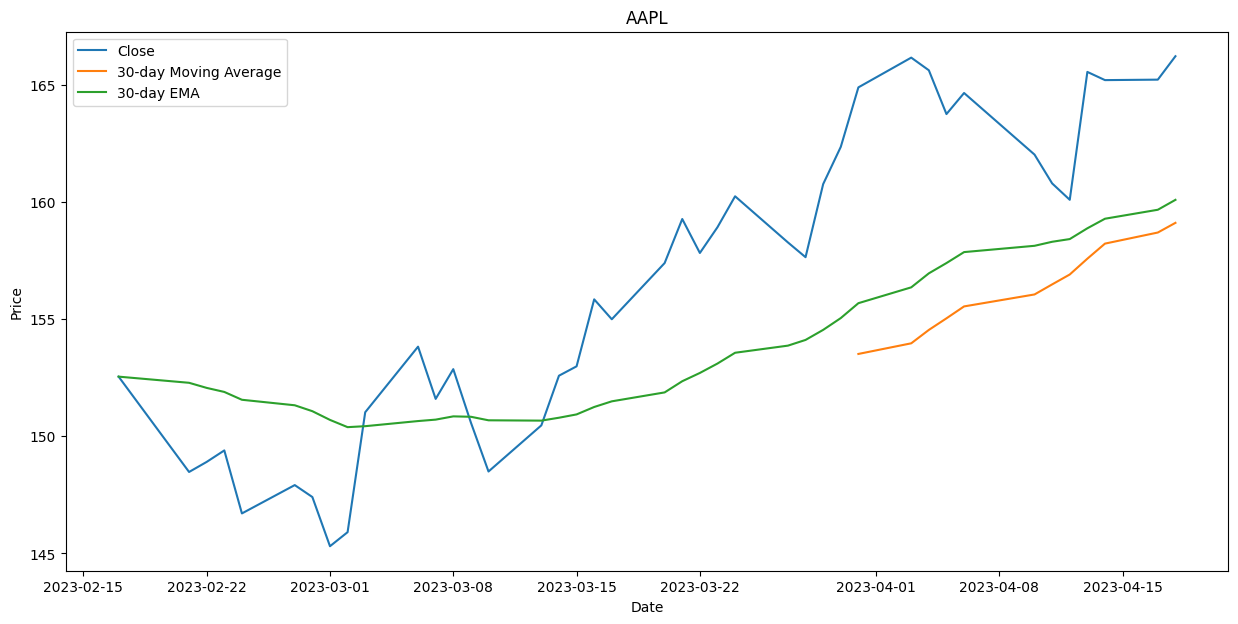

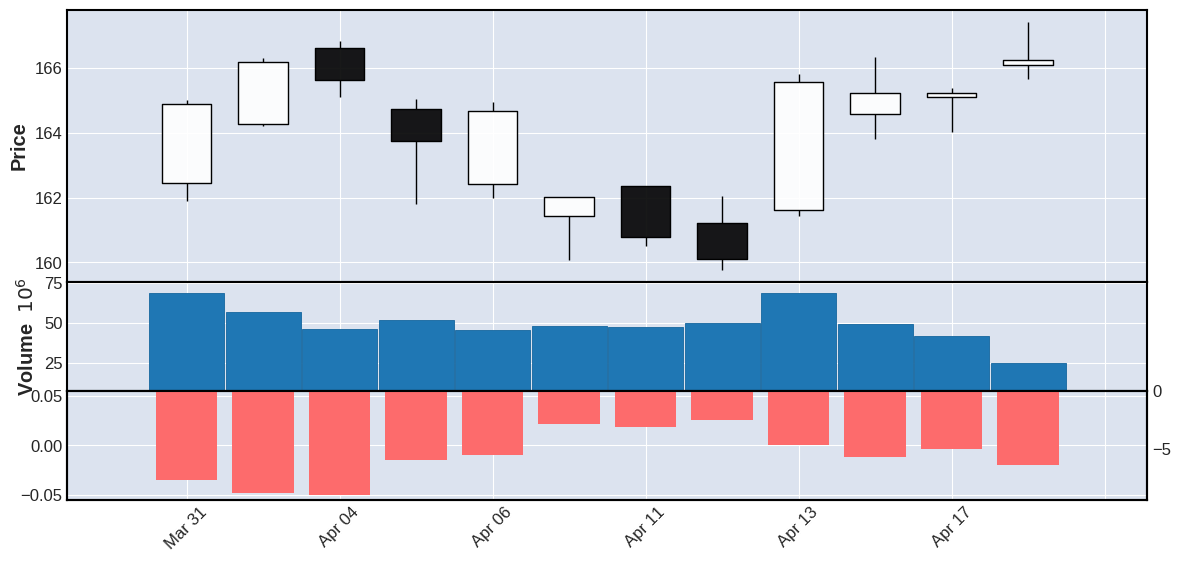

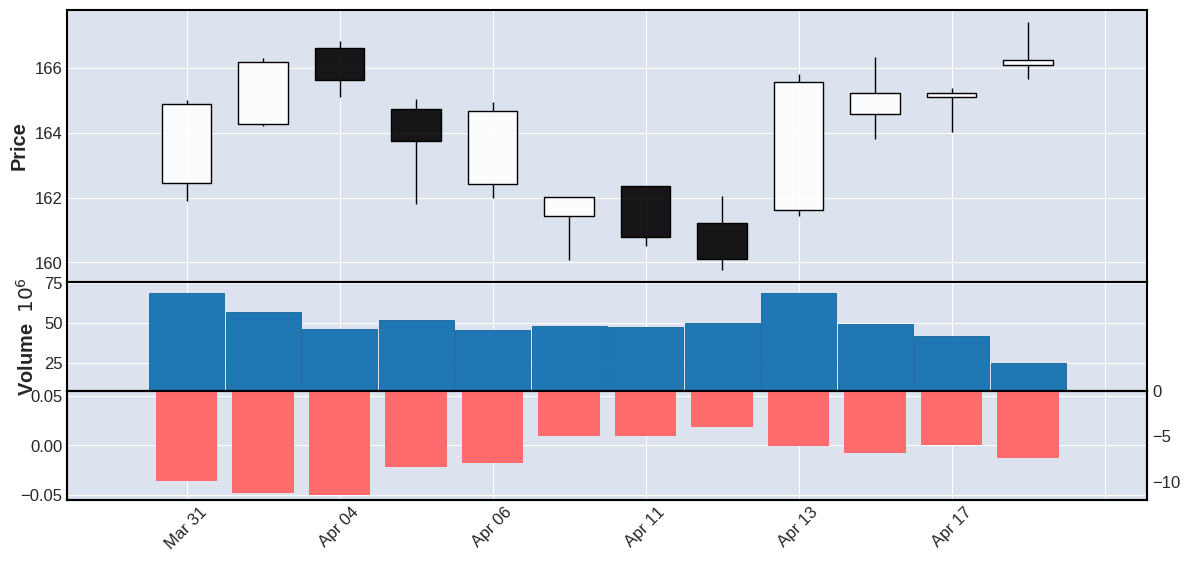

In [11]:
sc = input("Enter Stock Code")
days = int(input("Enter days"))
#sc, days = 'RELIANCE.NS', 60
#sc = input()
#days = int(input())
df = get_stonks(sc,days)
final_ema_bilkul(df,sc,days)

# ma = df['Close'].rolling(window=30).mean()
# ema = df['Close'].ewm(span=30, adjust=False).mean()
# df['ma'] = ma
# df['ema'] = ema
# diff_ema(df)
#df.iloc[-1:-5:-1]
#make_ma_ema(df,days,sc)

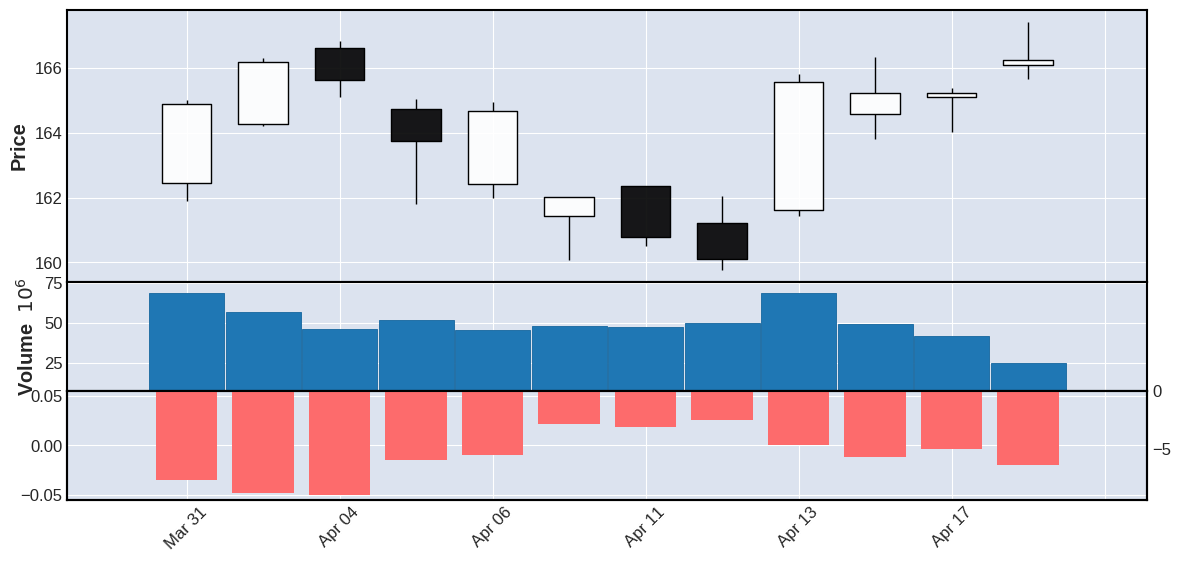

In [12]:
diff_ema(df)

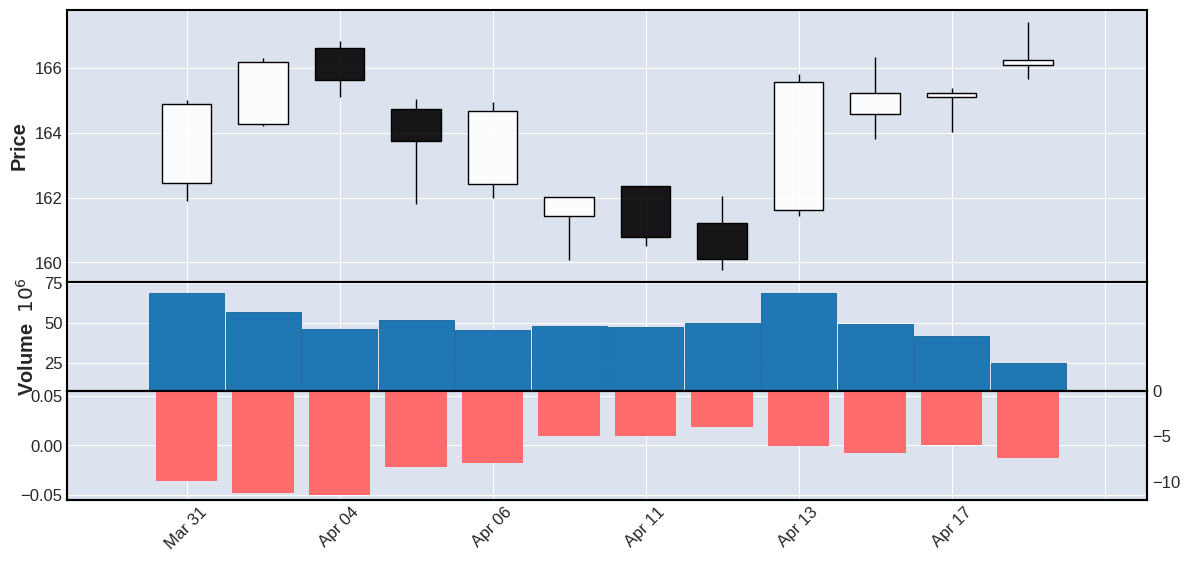

In [13]:
diff_ma(df)

In [14]:
#idkwhattocallthisfunc(df)

TypeError: ignored

In [ ]:
df.head()